In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=a5ba9df752c9e75493e71a25683b5acc5e2b3e75fe16808e2b719a7fd58647e5
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [65]:
import os
import sys
import re
import string
from pyspark.sql import SparkSession
from pyspark.sql.functions import regexp_replace, array_join, split
from pyspark.sql.functions import lower, col
from pyspark.ml.feature import StopWordsRemover

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable

In [66]:
def init_spark():
  spark = SparkSession.builder.appName("BigData").getOrCreate()
  sc = spark.sparkContext
  return spark,sc

def load_data_from_json(spark, file_name):
    return spark.read.json(file_name)

In [73]:
from datetime import datetime
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf, asc
from pyspark.sql.types import StringType


In [74]:
def get_arxiv_dataset():
  sc = init_spark()[0]
  return load_data_from_json(sc, "part1.json")

In [75]:
def filter_by_category(dataset, category):
  return dataset.filter(dataset.categories.contains(category))

In [76]:
def convert_data(rfc_1123_date):
  return datetime.strftime(datetime.strptime(rfc_1123_date, "%a, %d %b %Y %H:%M:%S %Z"), "%Y-%m")

In [77]:
def create_graph(dataset, category):
  dataset_panda = dataset.select("createDate", "count").toPandas()

  plt.plot(dataset_panda["createDate"], dataset_panda["count"])
  plt.xlabel('Date')
  plt.ylabel('Count')
  plt.xticks(rotation=60, ha='right')
  plt.title('Paper over time for {} category'.format(category))
  plt.show()

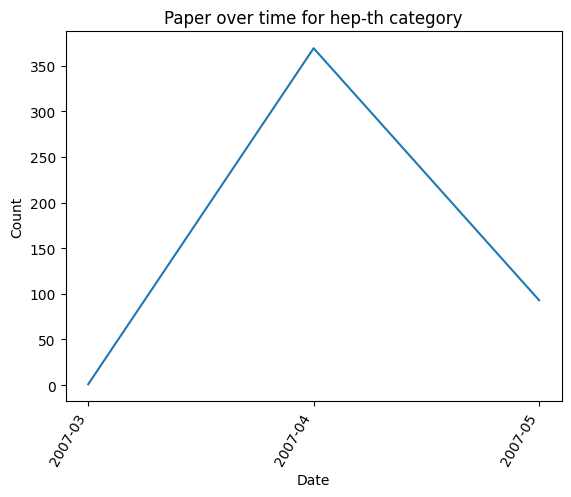

In [78]:
def show_papers_over_time(category):
  df = get_arxiv_dataset()

  # extract creation date
  convert_data_f = udf(convert_data, StringType())
  df = df.withColumn('createDate', convert_data_f(df.versions[0]['created']))

  df = filter_by_category(df, category)
  df = df.groupBy('createDate').count().orderBy(asc('createDate'))
  create_graph(df, category)

show_papers_over_time('hep-th')